# The Titanic Project

In [ ]:
Finding Some of the misteries of Titanic:

Q. How many Passengers on the ship?
Q. What's the ratio of Male, Female, Children?
Q. who were the passenders on the Titanic ?
Q. what deck were the passengers on and how does that relate to their class?
Q. where did the passengers come from?
Q. who was alone and who was with family?
Q. what was the percentage of Survived vs Age?

In [110]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
titanic_df = pd.read_csv('titanic.csv')

In [7]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
titanic_df['Sex'] = titanic_df['Sex'].astype(str)
titanic_df['Sex']=titanic_df['Sex'].replace(',', '')

In [19]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
df = titanic_df.fillna(method = 'pad') # filling the missing values with previous ones
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


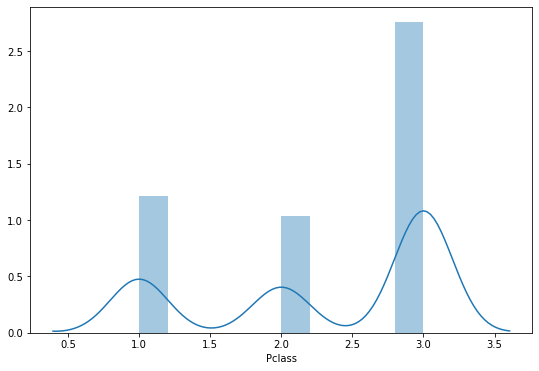

In [115]:
plt.figure(figsize=(9,6))
plt.tight_layout()
seabornInstance.distplot(df['Pclass'])

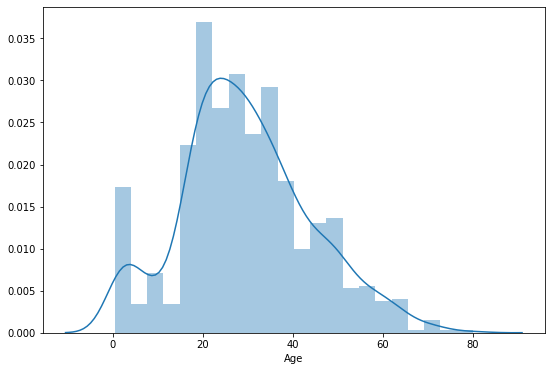

In [111]:
plt.figure(figsize=(9,6))
plt.tight_layout()
seabornInstance.distplot(df['Age'])

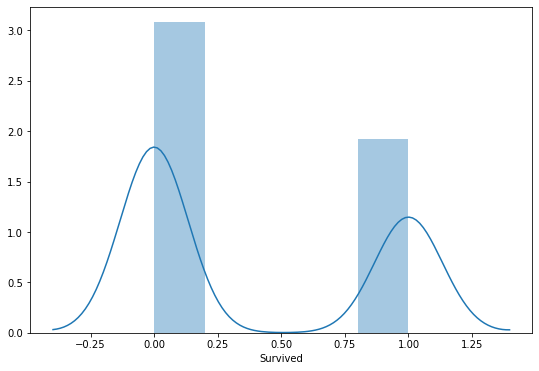

In [112]:
plt.figure(figsize=(9,6))
plt.tight_layout()
seabornInstance.distplot(df['Survived'])

In [24]:
df['Sex'].astype(str)

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

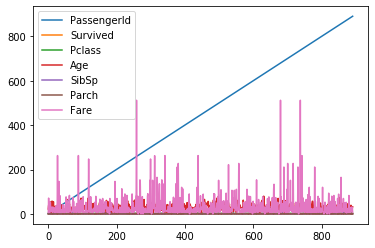

In [95]:
df['Sex'].astype(str)
#sns.factorplot('Sex',df,hue='Pclass')

df.plot()

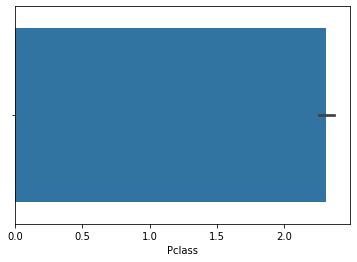

In [27]:
sns.barplot('Pclass',data=df,hue='Sex')

In [28]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [29]:
df['person'] = df[['Age','Sex']].apply(male_female_child,axis=1)

In [30]:
df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,male
5,6,0,3,"Moran, Mr. James",male,35.0,0,0,330877,8.4583,C123,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,E46,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,E46,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,E46,C,child


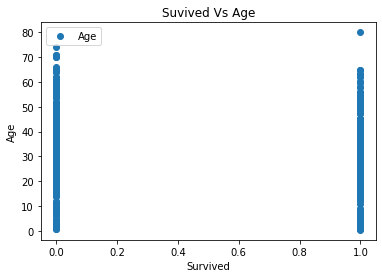

In [107]:
df.plot(x='Survived', y='Age', style='o')  
plt.title('Suvived Vs Age')  
plt.xlabel('Survived')  
plt.ylabel('Age')  
plt.show()

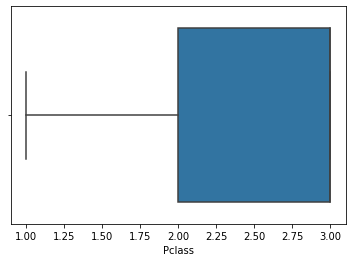

In [33]:
sns.boxplot('Pclass',data=df,hue='Sex')

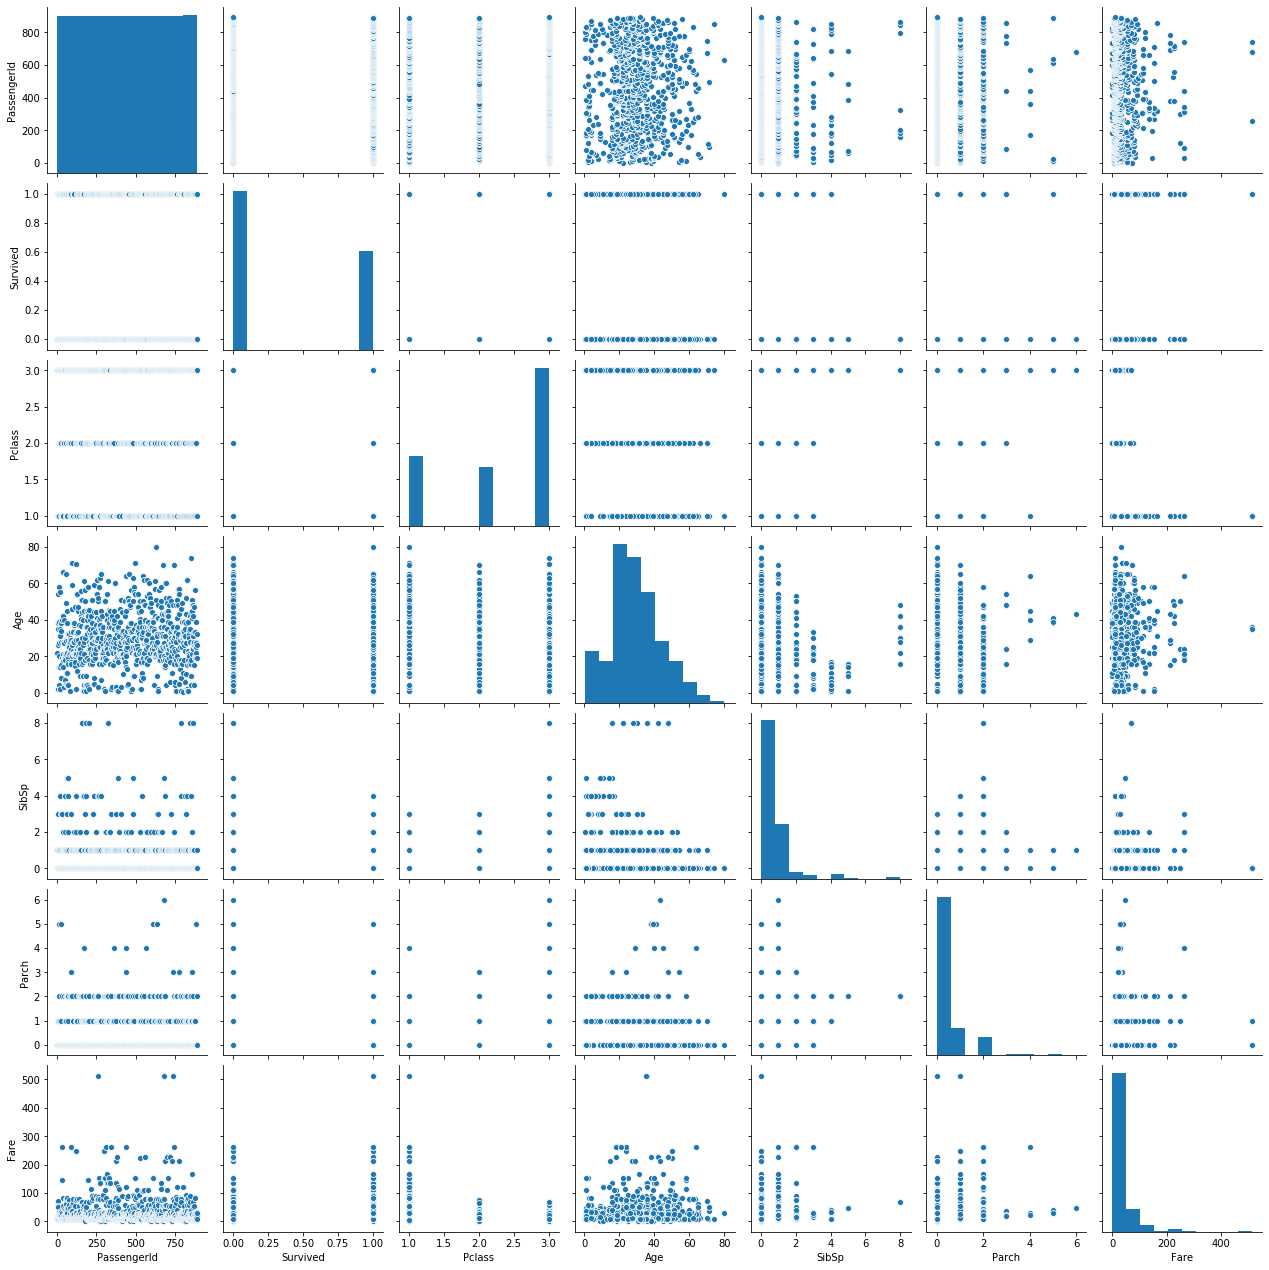

In [34]:
sns.pairplot(df)

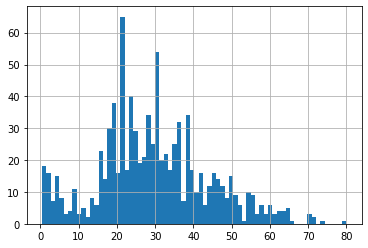

In [35]:
df['Age'].hist(bins=70)

In [37]:
df['Age'].mean()

29.581560044893376

In [38]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

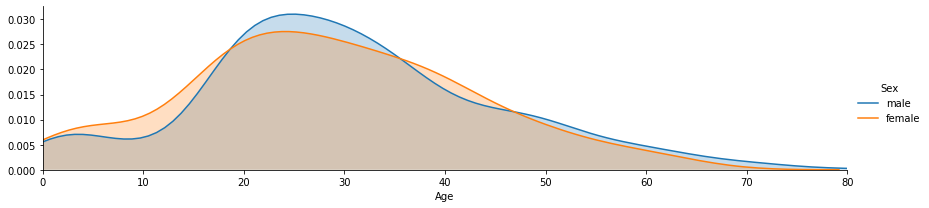

In [39]:
fig = sns.FacetGrid(df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

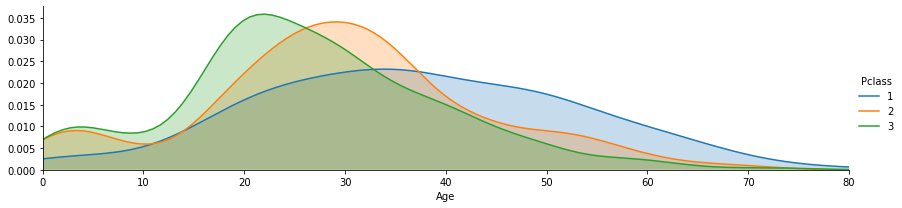

In [40]:
fig = sns.FacetGrid(df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [41]:
deck = df['Cabin'].dropna()

In [42]:
deck.head()

1     C85
2     C85
3    C123
4    C123
5    C123
Name: Cabin, dtype: object

In [43]:
levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
#sns.factorplot('Cabin',data=cabin_df,palette='winter_d')

In [89]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

In [50]:
df['Alone'] = df.SibSp + df.Parch

In [51]:
df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [52]:
df['Alone'].loc[df['Alone'] >0]

0      1
1      1
3      1
7      4
8      2
      ..
874    1
879    1
880    1
885    5
888    3
Name: Alone, Length: 354, dtype: int64

In [78]:
df['Alone'].loc[df['Alone'] == 0] = 'With Family'

df['Alone'].loc[df['Alone'] == 0] = 'Alone'
df['Alone']

0      With Family
1      With Family
2            Alone
3      With Family
4            Alone
          ...     
886          Alone
887          Alone
888    With Family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object

In [55]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,male,Alone


In [58]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

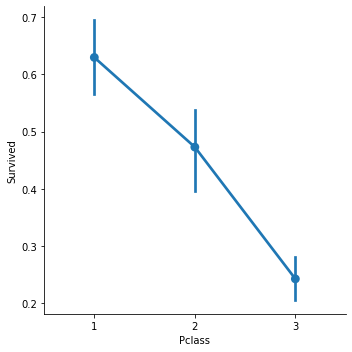

In [61]:
sns.factorplot('Pclass','Survived',data=df)

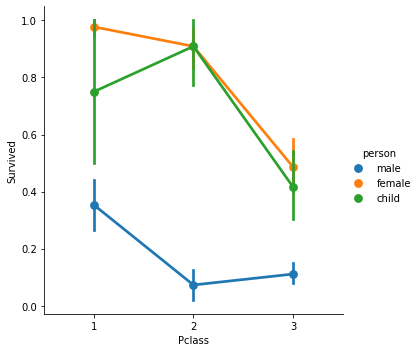

In [60]:
sns.factorplot('Pclass','Survived',hue='person',data=df)

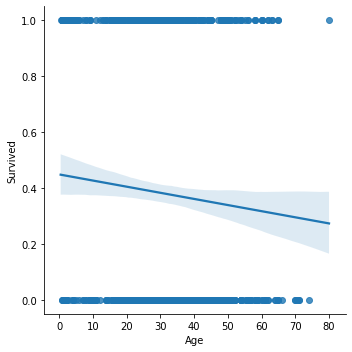

In [62]:
sns.lmplot('Age','Survived',data=df)

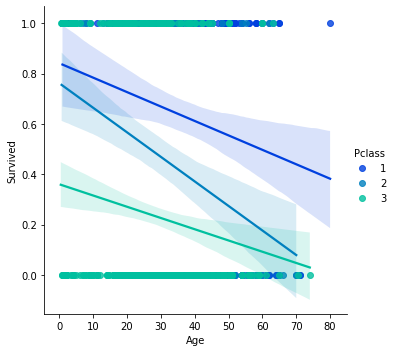

In [63]:
sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter')

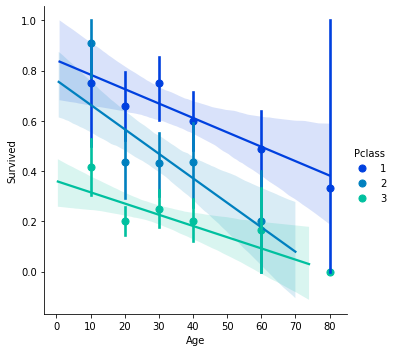

In [64]:
generations = [10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=df,palette='winter',x_bins=generations)

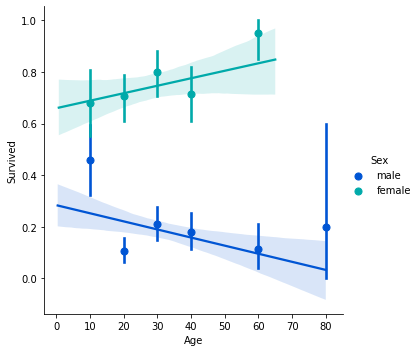

In [65]:
sns.lmplot('Age','Survived',hue='Sex',data=df,palette='winter',x_bins=generations)